# **Introduction**:

In today's political environment social media platforms have become one of the most important places for engaging in political discourse. One site in particular called Reddit features thousands of different topics and threads for people to commune and discuss, making it a great place for analysis. One factor of a Reddit post you may think is overlooked is the Title. It is the first piece of information presented to you when you interact with someones content and can be a deciding factor in engagement. My project focuses on the specfic subreddit called r/Politics which currently ranks as Reddits #58 ranked page with over 8 million users following. The project will examine how the tone or sentiment conveyed in the title will impact user engagement measured by the score given to each post. Scores are determined by upvotes and downvotes which users can interact with each post using small arrows.

Through many recent studies we are aware that negativity and emotional content are far more engaging than neutral content on the internet. Everyone loves to share their opinion on things that they believe are wrong or unjust. By analyzing the post titles in r/Politics it will give us an idea if users of the subreddit are more likely to share their opinion on  get involved in political discourse when the topics are negative, positive or neutral!


# **Research Question:**

Does negativity lead to more engagement in r/Politics?


# **Hypothesis:**

Titles that include negative sentiments will receive higher engagement than those with positive/ neutral sentiment.

# Data Collection

This data set features a collection of posts from r/Politics in 2021. The dataset features 8 Columns and over 28,000 data points. The data was uploaded from Kaggle.com and can be found [here!](https://www.kaggle.com/datasets/gpreda/politics-on-reddit/data)



In [ ]:
import pandas as pd
import numpy as np

# Upload and preview dataframe
df = pd.read_csv('reddit_politics.csv')
df.head()


,title,score,id,url,comms_num,created,body,timestamp
0,A Right Wing Group in Texas Is Making up Fake ...,166,ov1ll3,https://www.vice.com/en/article/wx5bg5/blm-whi...,34,1.627710e+09,NaN,2021-07-31 08:35:47
1,DOJ sues Texas over Gov. Abbott’s order for la...,85,ouwc9i,https://www.kxan.com/news/texas-politics/doj-s...,17,1.627688e+09,NaN,2021-07-31 02:26:12
2,"From white evangelicals to QAnon believers, wh...",57,ouqkxi,https://www.modbee.com/news/coronavirus/articl...,27,1.627671e+09,NaN,2021-07-30 21:45:09
3,DeSantis says he’ll sign order allowing parent...,269,oun2lc,https://www.orlandosentinel.com/politics/os-ne...,138,1.627660e+09,NaN,2021-07-30 18:43:05
4,"Show on the road: In Utah, Florida Gov. Ron De...",31,ouipnz,https://www.tallahassee.com/story/news/politic...,28,1.627644e+09,NaN,2021-07-30 14:21:54


In [ ]:
# Total rows and columns prior to cleaning
total_rows = df.shape[0]
total_columns = df.shape[1]

print(f"Total rows: {total_rows}")
print(f"Total columns: {total_columns}")


Total rows: 28063
Total columns: 8


# Data Cleaning

The data featured 8 columns, many of which I did not need for my analysis. I went ahead and removed any posts that had no content along with those that featured content of comments and created a new dataframe with the columns title and score. Score on reddit is calculated by adding upvotes and subtracting downvotes. A user may only upvote or downvote a singular post once.

The clean data left me with over 10,000 titles of posts from r/politics along with their score.

In [ ]:
# Removing any NA values
df_posts = df.dropna(subset=['title'])

# Removing rows from the 'title' column listed as comments.
df_posts = df.query('title != "Comment"').reset_index(drop=True)

# Creating a new dataset with only columns title and score.
df_posts = df_posts[['title', 'score']]
df_posts.head()



,title,score
0,A Right Wing Group in Texas Is Making up Fake ...,166
1,DOJ sues Texas over Gov. Abbott’s order for la...,85
2,"From white evangelicals to QAnon believers, wh...",57
3,DeSantis says he’ll sign order allowing parent...,269
4,"Show on the road: In Utah, Florida Gov. Ron De...",31


In [ ]:
# Total rows and columns after data cleaning
total_rows = df_posts.shape[0]
total_columns = df_posts.shape[1]

print(f"Total rows: {total_rows}")
print(f"Total columns: {total_columns}")

Total rows: 10036
Total columns: 2


# Data Visualization #1

Before testing my hypothesis, it is important to visualize the data in an effort to better understand what I am working with. The below graph shows a clear distribution of score in the r/politics page. Some conclusions we can make from this graph are that most posts get under 5000 upvotes, with some rare cases where the score can reach upwards of 80,000 upvotes.  

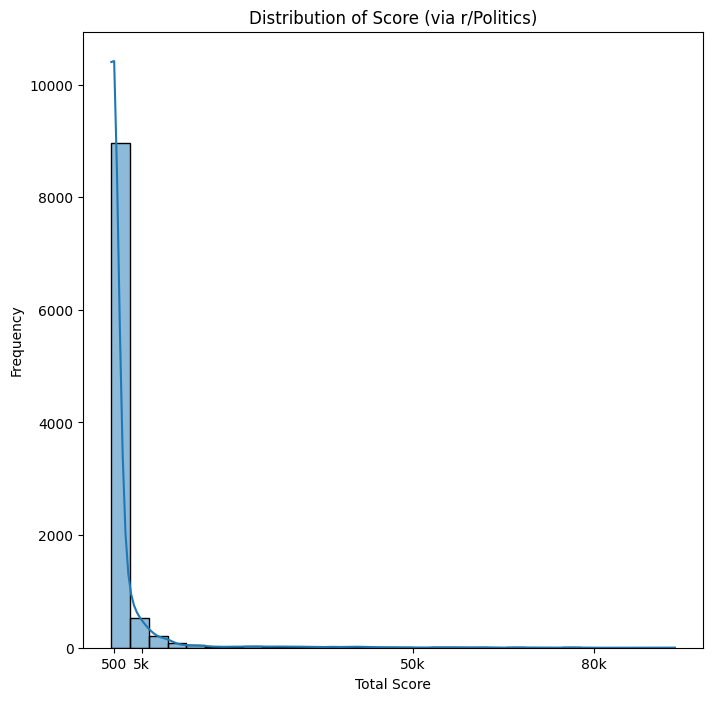

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of upvotes
plt.figure(figsize=(8, 8))
sns.histplot(df_posts['score'], kde=True, bins=30)
plt.title('Distribution of Score (via r/Politics)')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.xticks([ 500, 5000, 50000, 80000], labels=[ '500', '5k', '50k', '80k'])
plt.show()

In [ ]:
df_posts['score'].max()

93372

# Data Visualization #2

The below wordcloud analyzes all of the words in the "title" column and displays the most common words the largest. The most common words are Biden, Trump, Republican and Democrat.

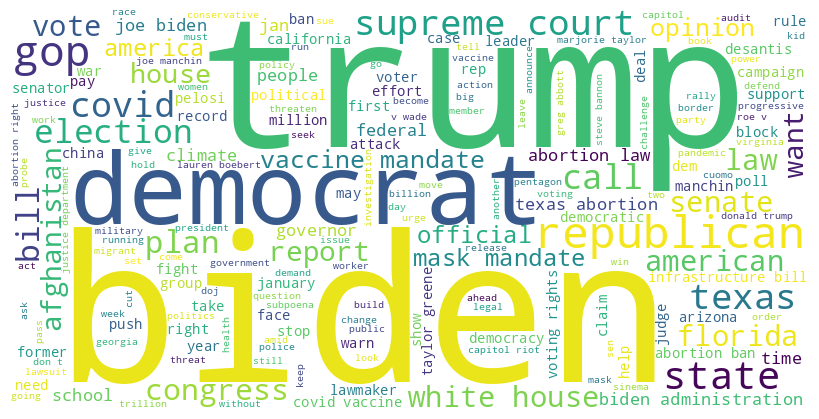

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all titles into a single string
all_titles = ' '.join(df_posts['title'].astype(str).tolist()).lower()

# Add more common words to the stopwords set
stopwords = set(STOPWORDS)
stopwords.update(["said", "says", "will", "new", "one", "us", "now", "say","back","make","end","way","top","talk","S","U",])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(all_titles)

# Display the wordcloud:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Data Analysis:

First a sentiment analysis was done of the 'title' column using the huggingface transformers library. I then extracted the sentiment label column and added it to my dataframe. I then found the average score for negative/positive posts. A t-test was completed to determine if there was a statistically significant difference between the scores of negative/positive posts.

In [ ]:
!pip install transformers torch
import pandas as pd
from transformers import pipeline

# Load the sentiment analysis pipeline
classifier = pipeline("sentiment-analysis")
def analyze_sentiment(titles):
    sentiments = []
    for title in titles:
        try:
            result = classifier(title)[0]
            sentiments.append(result)
        except Exception as e:
            print(f"Error analyzing title: {title}. Error: {e}")
            sentiments.append({"label": "Error", "score": 0.0})
    return sentiments

df_posts['sentiment'] = analyze_sentiment(df_posts['title'])

df_selected_columns = df_posts[['title', 'score', 'sentiment_label']]
df_posts = df_posts[['title', 'score', 'sentiment_label']]
print(df_posts.head())

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


                                               title  score sentiment_label
0  A Right Wing Group in Texas Is Making up Fake ...    166        NEGATIVE
1  DOJ sues Texas over Gov. Abbott’s order for la...     85        NEGATIVE
2  From white evangelicals to QAnon believers, wh...     57        NEGATIVE
3  DeSantis says he’ll sign order allowing parent...    269        NEGATIVE
4  Show on the road: In Utah, Florida Gov. Ron De...     31        NEGATIVE


sentiment_label
NEGATIVE    1796.867479
POSITIVE    1133.921687
Name: score, dtype: float64


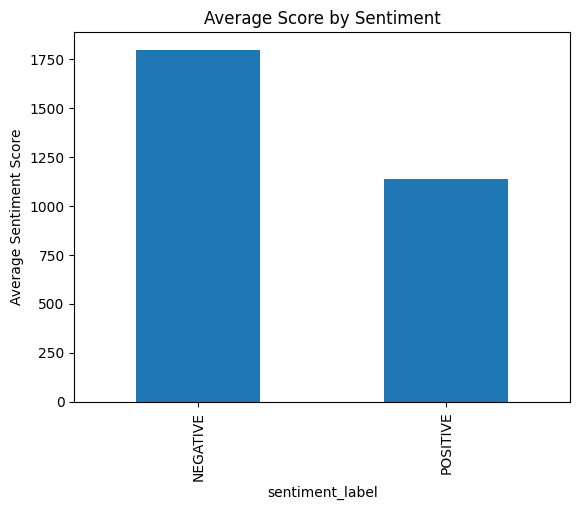

In [ ]:
average_scores = df_posts.groupby('sentiment_label')['score'].mean()

print(average_scores)


import matplotlib.pyplot as plt
average_scores.plot(kind='bar', title='Average Score by Sentiment')
plt.ylabel('Average Sentiment Score')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

negative_scores = df_posts[df_posts['sentiment_label'] == 'NEGATIVE']['score']
positive_scores = df_posts[df_posts['sentiment_label'] == 'POSITIVE']['score']

t_statistic, p_value = ttest_ind(negative_scores, positive_scores)

print("T-statistic:", t_statistic)
print("P-value:", f"{p_value:.7f}")

T-statistic: 4.9222286568798115
P-value: 0.0000009


# Conclusion:


The analysis indicates that negative sentiment in post titles on r/politics significantly affects engagement. The results of the t-test (t = 4.92, p < 0.000001) provide strong statistical evidence that posts with negative sentiment receive higher scores on Reddit.

This suggests that users on r/politics are more likely to interact with posts that contain negative emotionally charged language.

Future studies could explore whether this trend persists across different political subreddits or social media platforms. Additionally, examining the impact of other factors such as post length, specific topics, or user engagement patterns could provide a more comprehensive understanding of what drives interactions on r/politics.
